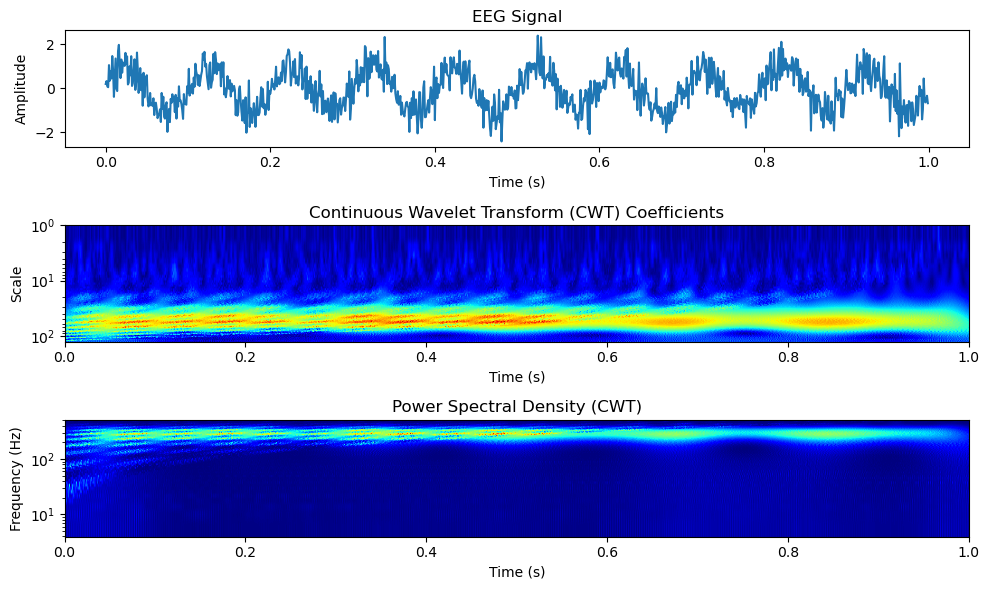

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate a sample EEG signal
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second of EEG data
eeg_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))  # Example EEG signal

# Wavelet Transform parameters
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)  # Scales for the wavelet transform

# Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(eeg_signal, scales, wavelet, sampling_period=1/fs)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot EEG signal
plt.subplot(3, 1, 1)
plt.plot(t, eeg_signal)
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot CWT coefficients
plt.subplot(3, 1, 2)
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, 1, scales[-1], scales[0]], cmap='jet')
plt.title('Continuous Wavelet Transform (CWT) Coefficients')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.yscale('log')  # Log-scale for better visualization

# Plot the power spectral density
plt.subplot(3, 1, 3)
plt.imshow(np.abs(coefficients)**2, aspect='auto', extent=[0, 1, frequencies[-1], frequencies[0]], cmap='jet')
plt.title('Power Spectral Density (CWT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')  # Log-scale for better visualization

plt.tight_layout()
plt.show()